In [1]:
import matplotlib.pyplot as plt # For general plotting
from matplotlib import cm

import numpy as np
from scipy.stats import multivariate_normal # MVN not univariate

import pandas


# TAKEN FROM MARK ZOLOTAS
#from module import model

#import model

from collections import defaultdict


from sklearn.decomposition import PCA

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(7)

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title

In [2]:
# data = defaultdict(list) # each value in each column is appended to a list

# songdata = pandas.read_csv('data.csv', sep = ',')  


file_path = "data.csv"
songdata = pandas.read_csv(file_path, index_col='year')

In [12]:
print(songdata.head(3))

songdata.shape

songdata.columns

# see what datatype Pandas interprets each column as 
songdata.dtypes

      acousticness  danceability  duration_ms  energy  explicit  \
year                                                              
1928         0.995         0.708       158648  0.1950         0   
1928         0.994         0.379       282133  0.0135         0   
1928         0.604         0.749       104300  0.2200         0   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
year                                                                          
1928             0.563   10    0.1510   -12.428     1       0.0506  118.469   
1928             0.901    8    0.0763   -28.454     1       0.0462   83.972   
1928             0.000    5    0.1190   -19.924     0       0.9290  107.177   

      valence  
year           
1928   0.7790  
1928   0.0767  
1928   0.8800  


acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [13]:
# size = len(songdata)

# labels = set()
# for ax in songdata.index:
#     labels.add(ax)


songdata.drop(['artists','id', 'name', 'release_date', 'popularity'], axis = 1, inplace = True)

songdata.shape
#songdata.drop(['artists','duration_ms','key', 'explicit', 'id', 'name', 'mode', 'release_date', 'popularity'])




KeyError: "['artists', 'id', 'name', 'release_date', 'popularity'] not found in axis"

In [16]:

# l_drop = np.arange(1920,1950)
# l_drop = np.concatenate((l_drop,[0,1900, 1908, 1909, 1917, 2020]))
# songdata.drop(labels=l_drop, axis=0, inplace = True)

# a = np.sort(songdata.index.unique())
# a

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [32]:
# y = songdata.values

# f = []

# for item in y:
#     f.append(float(item))
# print(f)

# #

In [14]:
#ax_pca = fig.add_subplot(111, projection='3d')

pca = PCA(n_components=3)  # n_components is how many PCs we'll keep
X_fit = pca.fit(songdata)  # Is a fitted estimator, not actual data to project
Z = pca.transform(songdata)
#pca.get_precision()

# Illustrates that we have at least 90% of the total variance captured by the PCA
print("Explained variance ratio: ", pca.explained_variance_ratio_)

pca.get_feature_names_out()

print(pca.n_features_)

Explained variance ratio:  [9.99999933e-01 6.41924603e-08 2.08892874e-09]
13


In [18]:
unique_qualities = np.sort(songdata.index.unique())

print(unique_qualities)

print(unique_qualities[0])

print(unique_qualities[-1])

[1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934
 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020]
1921
2020


In [21]:
# enc = LabelEncoder()

# labels = song_db.index
# enc.fit(song_db.index.unique())

# y = enc.transform(np.array(labels))
# print(np.unique(y))

y_decade = unique_qualities//10
Y_decade = np.unique(y_decade)
print(np.unique(Y_decade))

[192 193 194 195 196 197 198 199 200 201 202]


In [19]:
# plot original data

#wine_df[wine_df['quality']==q]['fixed acidity'], 

fig = plt.figure(figsize=(10, 2020))

ax_subset = fig.add_subplot(111, projection='3d')

for q in range(unique_qualities[0], unique_qualities[-1]):
    ax_subset.scatter(songdata[songdata['energy']==q], 
                      songdata[songdata['liveness']==q], 
                      songdata[songdata['tempo']==q],
                      label="year{}".format(q))
    
ax_subset.set_xlabel("fixed acidity")
ax_subset.set_ylabel("alcohol")
ax_subset.set_zlabel("pH")

# Set equal axes for 3D plots to realize the additional challenges in visualization
# ax_subset.set_box_aspect((np.ptp(wine_df['fixed acidity']), np.ptp(wine_df['alcohol']), np.ptp(wine_df['pH'])))

plt.title("Wine Subset of Features")
plt.legend()
plt.tight_layout()
plt.show()

ValueError: Image size of 720x145440 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 720x145440 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x145440 with 1 Axes>

In [ ]:


for q in range(unique_qualities[0], unique_qualities[-1]):
    ax_pca.scatter(Z[wine_df['quality']==q, 0], 
                      Z[wine_df['quality']==q, 1], 
                      Z[wine_df['quality']==q, 2], label="Quality {}".format(q))
    
ax_pca.set_xlabel(r"$z_1$")
ax_pca.set_ylabel(r"$z_2$")
ax_pca.set_zlabel(r"$z_3$")

ax_pca.set_box_aspect((np.ptp(Z[:, 0]), np.ptp(Z[:, 1]), np.ptp(Z[:, 2])))

plt.title("PCA of Wine Dataset")
plt.legend()
plt.tight_layout()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

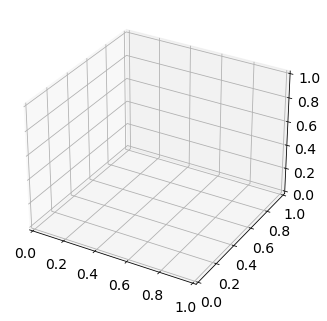

In [6]:
# # TAKEN FROM PCA EXAMPLE BY MARK ZOLOTAS

# # Perform PCA on transposed GMM variable X
# _, _, Z = models.perform_pca(X)

# # Add back mean vector to PC projections if you want PCA reconstructions
# Z_GMM = Z + np.mean(X, axis=0)


# Plot original data vs PCA reconstruction data
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(songdata[:, 0], songdata[:, 1], songdata[:, 2])
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("x3")
ax1.set_title("x ~ {}D GMM data".format(n))

# ax2 = fig.add_subplot(212, projection='3d')
# ax2.scatter(Z_GMM[:, 0], Z_GMM[:, 1], Z_GMM[:, 2])
# ax2.set_xlabel("z1")
# ax2.set_ylabel("z2")
# ax2.set_zlabel("z3")
# ax2.set_title("PCA projections of {}D GMM data".format(n))
# plt.show()

# # Let's see what it looks like only along the first two PCs
# fig = plt.figure(figsize=(12, 12))

# ax1 = fig.add_subplot(211)
# ax1.scatter(X[:, 0], X[:, 1])
# ax1.set_xlabel("x1")
# ax1.set_ylabel("x2")
# ax1.set_title("x ~ {}D GMM data to 2D space".format(n))

# ax2 = fig.add_subplot(212)
# ax2.scatter(Z_GMM[:, 0], Z_GMM[:, 1])
# ax2.set_xlabel("z1")
# ax2.set_ylabel("z2")
# ax2.set_title("PCA projections of {}D GMM data to 2D space".format(n))
# plt.show()